# Global renewable energy analysis - Hypothesis testing

**Objective**
In this notebook we will provide deeper insight towards satisfying the business requirements of understanding global trends in renewable energy. We will do this by testing specific hypotheses outlined below using a combination of advanced visualisations and machine learning techniques.

**Hypotheses**
- **H1:** Historical growth in renewables is linked to a country's gross domestic product (GDP). Countries with higher GDP have slower growth in fossil fuel consumption (they already peaked) and faster growth in renewables. In contrast, emerging economies (those with lower GDP) still show strong growth in fossil fuel consumption.

- **H2:** Predicting the green energy transition. Renewable production will continue to increase over the next decade, accelerating the transition to green energy. The rate of this growth will vary geographically, with some countries leading the way in the green energy transition. 

- **H3:** Energy mix varies geographically. Groups of countries have emerged which have similar energy profiles (investment in different types of energy), higlighting the need for countries to optimise their use of local natural resources and conditions.

**Input**
- Cleaned dataset of energy production and consumption from 1982-2022 per country ('world_energy_consumption_cleaned.csv') 
- Five-year summary (2018-2022) of energy production and consumption (average and total) per country ('world_energy_consumption_last5_summary.csv')

**Output**



## Load data and libraries

In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import plotly.express as px

In [2]:
#Check working directory
#change to correct directory if needed
os.chdir('c:\\Users\\User\\OneDrive\\Documents\\Code Institute Data Analytics and AI\\Capstone project - renewables\\global_renewable_energy_analysis')
current_dir = os.getcwd()
current_dir #show cwd

'c:\\Users\\User\\OneDrive\\Documents\\Code Institute Data Analytics and AI\\Capstone project - renewables\\global_renewable_energy_analysis'

In [3]:
#load data
df = pd.read_csv('./data/world_energy_consumption_cleaned.csv')
df_last5 = pd.read_csv('./data/world_energy_consumption_last5_summary.csv')
df.head()

,country,iso_code,year,population,gdp,continent,sub_region,per_capita_electricity,energy_per_capita,energy_per_gdp,...,renewables_elec_per_capita,renewables_energy_per_capita,renewables_cons_change_pct,renewables_share_energy,renewables_share_elec,fossil_elec_per_capita,fossil_energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_share_elec
0,Afghanistan,AFG,1982,10088290.0,1.598041e+10,Asia,Southern Asia,NaN,926.651,0.585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1983,9951447.0,1.675533e+10,Asia,Southern Asia,NaN,1149.196,0.683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1984,10243689.0,1.707215e+10,Asia,Southern Asia,NaN,1121.573,0.673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1985,10512220.0,1.710848e+10,Asia,Southern Asia,NaN,1067.071,0.656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1986,10448447.0,1.764135e+10,Asia,Southern Asia,NaN,1097.040,0.650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## H1: Historical trends

Historical growth in renewables is linked to a country's gross domestic product (GDP). Countries with higher GDP have slower growth in fossil fuel consumption (they already peaked) and faster growth in renewables. In contrast, emerging economies (those with lower GDP) still show strong growth in fossil fuel consumption.

Prediction: fossil fuel growth (percentage annual change) will show a negative relationship with GDP, while growth in renewables (percentage annual change) will show a positive relationship with GDP.

Let's plot percentage annual growth in renewables and fossil fuels against GDP per country (averages over the last 5 years). We will add in a global average as a baseline for comparison.

In [4]:
# Get global average for last 5 years in percent growth and gdp columns
global_avg = df[df['year']>=2018][['renewables_cons_change_pct', 'fossil_cons_change_pct', 'gdp']].mean().rename(index={
    'renewables_cons_change_pct': 'renewables_cons_change_pct_mean',
    'fossil_cons_change_pct': 'fossil_cons_change_pct_mean',
    'gdp': 'gdp_mean'
}).to_frame().T

global_avg['country_'] = 'Global'#add country_ column with value 'Global'
#global_avg

# extract the same columns from df_last5 for plotting
df_last5_plot = df_last5[['country_', 'renewables_cons_change_pct_mean', 'fossil_cons_change_pct_mean', 'gdp_mean']]
#append global average row to df_last5_plot
df_last5_plot = pd.concat([df_last5_plot, global_avg], ignore_index=True)
df_last5_plot['country_'].value_counts()


country_
Afghanistan    1
Palestine      1
New Zealand    1
Nicaragua      1
Niger          1
              ..
Gibraltar      1
Greece         1
Greenland      1
Grenada        1
Global         1
Name: count, Length: 217, dtype: int64

### Fossil fuel growth vs GDP

In [21]:
#plot fossil fuel consumption change pct vs gdp

# Get the 'Global' datapoint
global_row = df_last5_plot[df_last5_plot['country_'] == 'Global'].iloc[0]
global_gdp = global_row['gdp_mean']
global_fossil = global_row['fossil_cons_change_pct_mean']

fig = px.scatter(
    df_last5_plot,
    x='gdp_mean',
    y='fossil_cons_change_pct_mean',
    hover_name='country_',
    title='Growth in Fossil Fuel Consumption vs GDP per country (averaged over last 5 years)',
    labels={
        'gdp_mean': 'GDP (log-transformed)',
        'fossil_cons_change_pct_mean': 'Percentage growth in fossil fuel consumption'
    },
    log_x=True,
    trendline='ols',
    template='plotly_white',
    symbol=df_last5_plot['country_'].apply(lambda x: 'star' if x == 'Global' else 'circle'),
    color=df_last5_plot['country_'].apply(lambda x: 'red' if x == 'Global' else 'blue'),
)

# Add horizontal and vertical lines for the 'Global' datapoint
fig.add_vline(x=global_gdp, line_dash="dash", line_color="red", annotation_text="Global GDP", annotation_position="top left")
fig.add_hline(y=global_fossil, line_dash="dash", line_color="red", annotation_text="Global Fossil Growth", annotation_position="bottom right")

fig.update_layout(showlegend=False)  # Remove legend

fig.show()

#ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed
#update package and restart kernel

Now let's test this relationship with an OLS regression analysis. We'll use the dataset without the 'global' datapoint as this isn't a real value we want to include.

Fit the model:

In [27]:
#regression analysis of fossil fuel consumption change pct vs gdp

#first we need to log-transform the gdp values
df_last5['gdp_mean_log'] = np.log(df_last5['gdp_mean'])
df_h1_test = df_last5.dropna(subset=['fossil_cons_change_pct_mean', 'gdp_mean_log'])

#perform linear regression
import statsmodels.api as sm
X = df_h1_test[['gdp_mean_log']]
y = df_h1_test['fossil_cons_change_pct_mean']
X = sm.add_constant(X)  # add constant term for intercept
model = sm.OLS(y, X).fit()

Evaluate the model fit using diagnostic plots. These plots allow us to check key model assumptions like linearity and homoscedasticity (constant variance of residuals). The plots include fitted vs actual data, and residuals vs independent variable. We want to see random scatter with no obvious patterns here, and check that the linear trend is a reasonable fit. 

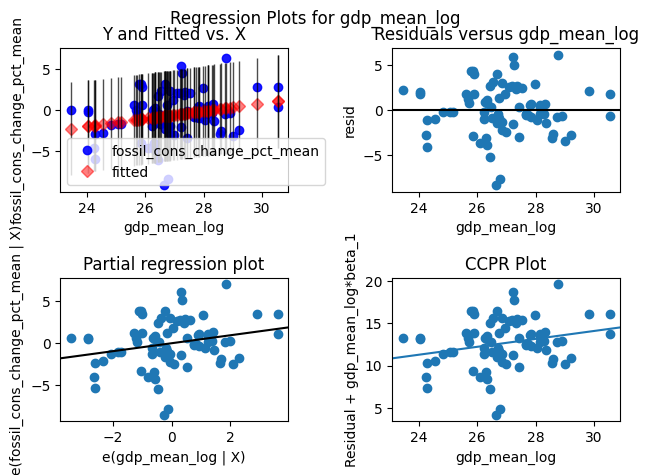

In [28]:
import statsmodels.api as sm
fig = sm.graphics.plot_regress_exog(model, 'gdp_mean_log')
plt.show()

View model results

In [29]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     fossil_cons_change_pct_mean   R-squared:                       0.058
Model:                                     OLS   Adj. R-squared:                  0.046
Method:                          Least Squares   F-statistic:                     4.757
Date:                         Mon, 03 Nov 2025   Prob (F-statistic):             0.0322
Time:                                 14:39:49   Log-Likelihood:                -190.20
No. Observations:                           79   AIC:                             384.4
Df Residuals:                               77   BIC:                             389.1
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
#evaluate p-value for gdp_mean_log coefficient
p_value = model.pvalues['gdp_mean_log'].round(4)
print(f"P-value for GDP coefficient: {p_value}")
if p_value < 0.05:
    print("Reject null hypothesis: there is a significant relationship between GDP and fossil fuel consumption growth.")
else:
    print("Fail to reject null hypothesis: no significant relationship between GDP and fossil fuel consumption growth.")

P-value for GDP coefficient: 0.0322
Reject null hypothesis: there is a significant relationship between GDP and fossil fuel consumption growth.


**Conclusion:** based on data from the last 5 years, there is no relationship between a country's GDP and their annual growth in fossil fuel consumption (on average). 
Globally, over the last 5 years fossil fuel consumption has decreased by -0.62% on average. Countries like Vietnam and Bangladesh show some of the highest growth in fossil fuel consumption (around 5% on average over the last 5 years) while their average GDP is similar to the global average. In contrast, countries like Hong Kong and Ukraine have average GDP's below the global average, but have shown a reduction in fossil fuels of aorund 8-9% on average over the last 5 years.

### Renewables growth vs GDP

First, let's visualise the relationship

In [37]:
#plot renewables consumption change pct vs gdp

# Get the 'Global' datapoint
global_row = df_last5_plot[df_last5_plot['country_'] == 'Global'].iloc[0]
global_gdp = global_row['gdp_mean']
global_renew = global_row['renewables_cons_change_pct_mean']

fig = px.scatter(
    df_last5_plot,
    x='gdp_mean',
    y='renewables_cons_change_pct_mean',
    hover_name='country_',
    title='Growth in Renewables Consumption vs GDP per country (averaged over last 5 years)',
    labels={
        'gdp_mean': 'GDP (log-transformed)',
        'renewables_cons_change_pct_mean': 'Percentage growth in Renewables consumption'
    },
    log_x=True,
    trendline='ols',
    template='plotly_white',
    symbol=df_last5_plot['country_'].apply(lambda x: 'star' if x == 'Global' else 'circle'),
    color=df_last5_plot['country_'].apply(lambda x: 'red' if x == 'Global' else 'green'),
)

# Add horizontal and vertical lines for the 'Global' datapoint
fig.add_vline(x=global_gdp, line_dash="dash", line_color="red", annotation_text="Global GDP", annotation_position="top left")
fig.add_hline(y=global_renew, line_dash="dash", line_color="red", annotation_text="Global Renewables Growth", annotation_position="bottom right")

fig.update_layout(showlegend=False)  # Remove legend

fig.show()

Now let's fit the model

In [33]:
#regression analysis of fossil fuel consumption change pct vs gdp

#first we need to log-transform the gdp values
df_last5['gdp_mean_log'] = np.log(df_last5['gdp_mean'])
df_h1_test = df_last5.dropna(subset=['renewables_cons_change_pct_mean', 'gdp_mean_log'])

#perform linear regression
X = df_h1_test[['gdp_mean_log']]
y = df_h1_test['renewables_cons_change_pct_mean']
X = sm.add_constant(X)  # add constant term for intercept
model = sm.OLS(y, X).fit()

Evaluate the mode fit

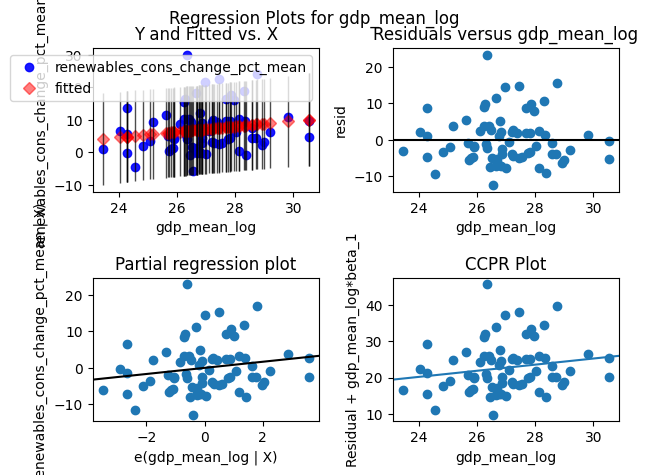

In [34]:
fig = sm.graphics.plot_regress_exog(model, 'gdp_mean_log')
plt.show()

View model output

In [35]:
print(model.summary())

#evaluate p-value for gdp_mean_log coefficient
p_value = model.pvalues['gdp_mean_log'].round(4)
print(f"P-value for GDP coefficient: {p_value}")
if p_value < 0.05:
    print("Reject null hypothesis: there is a significant relationship between GDP and fossil fuel consumption growth.")
else:
    print("Fail to reject null hypothesis: no significant relationship between GDP and fossil fuel consumption growth.")

                                   OLS Regression Results                                  
Dep. Variable:     renewables_cons_change_pct_mean   R-squared:                       0.031
Model:                                         OLS   Adj. R-squared:                  0.017
Method:                              Least Squares   F-statistic:                     2.251
Date:                             Mon, 03 Nov 2025   Prob (F-statistic):              0.138
Time:                                     14:41:24   Log-Likelihood:                -242.74
No. Observations:                               73   AIC:                             489.5
Df Residuals:                                   71   BIC:                             494.1
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]

**Conclusion:** Based on the data for the last 5 years, there is no relationship between a country's average GDP and the average annual percentage growth in renewables. Countries such as Israel, Indonesia, Netherlands and Iraq have all shown growth of over 20% on average over the last 5 years, and are both above (Indonesia, Netherlands) and below (Israel ,Iraq) the global average GDP. Latvia and Uzbekistan have shown the fastest reduction in renewables consumption over the last 5 years, on average around 5-6%.

**Further insights:** Perhaps the link between growth in fossil/renewables and GDP depends on region. To test this, we could use a multiple linear regression adding in region/continent as an interaction term with GDP.

## H2: Predicting the green energy transition

Renewable production will continue to increase over the next decade, accelerating the transition to green energy. The rate of this growth will vary geographically, with some countries leading the way in the green energy transition. 

**Test:** Identify outlier countries with above-average renewables share of production (leaders) and below-average (laggers). Forecast trends in production of each type of renewable per sub-region for the next 10 years using ML methods.

### Identify leaders and laggers

First let's plot histograms of overall renewable production and per energy type, averaged over the last 5 years.

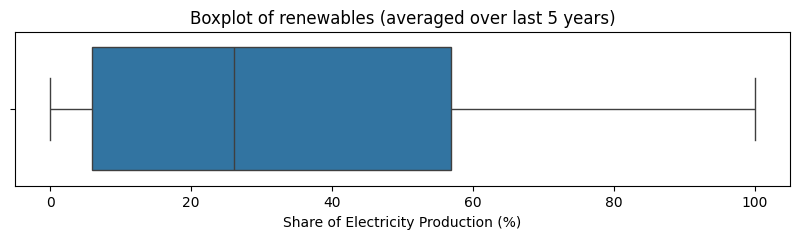

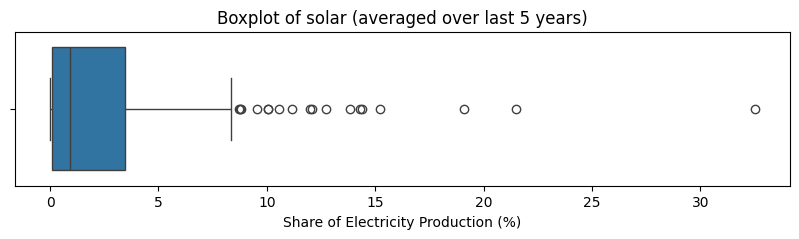

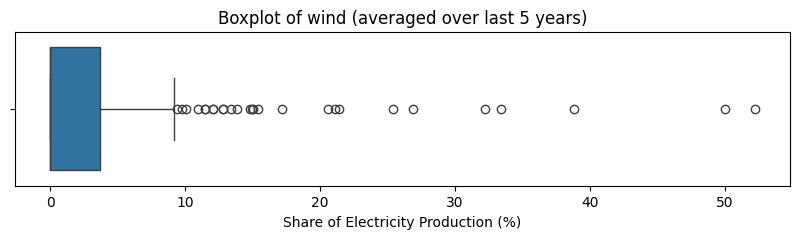

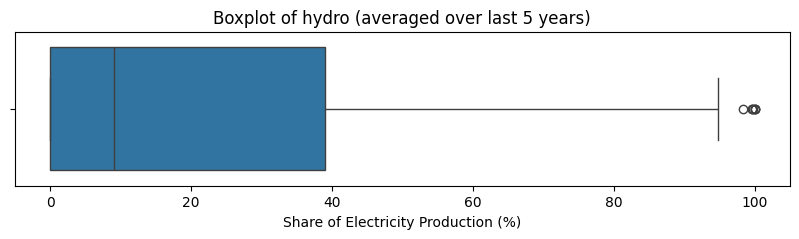

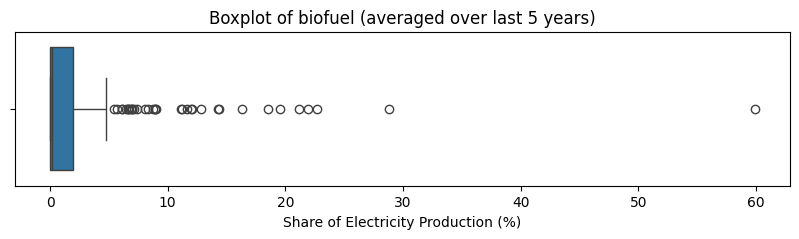

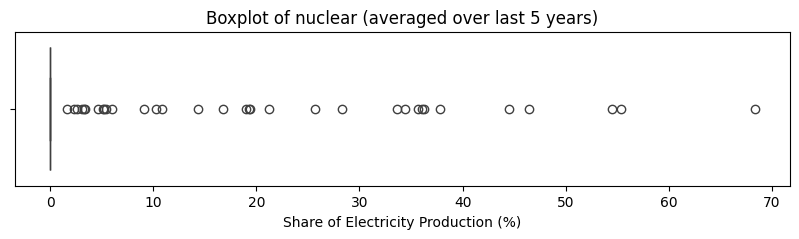

In [68]:
#plot boxplots of renewables production per type and overall
cols = ['renewables_share_elec_mean', 'solar_share_elec_mean', 'wind_share_elec_mean',
        'hydro_share_elec_mean', 'biofuel_share_elec_mean', 'nuclear_share_elec_mean']

for col in cols:
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=df_last5, x=col)  # Changed y to x for horizontal orientation
    plt.title(f'Boxplot of {col.split("_")[0]} (averaged over last 5 years)')
    plt.xlabel('Share of Electricity Production (%)')  # Changed ylabel to xlabel
    plt.show()


Identify outliers (those outside of 1.5*upper or lower quartile) overall and per energy type

In [ ]:
#function for calculating outliers based on IQR
def detect_outliers_iqr(column, threshold=1.5):
    iqr = column.quantile(0.75) - column.quantile(0.25) #IQR
    lower_bound = column.quantile(0.25) - threshold * iqr
    upper_bound = column.quantile(0.75) + threshold * iqr
    
    #Create categories based on position relative to bounds
    result = pd.Series(index=column.index, dtype='object')
    result[(column > upper_bound)] = 'leader'
    result[(column < lower_bound)] = 'lagger'
    result[((column >= lower_bound) & (column <= upper_bound)) | column.isna()] = 'normal'
    
    return result

#apply function to each renewables production share column
outliers = df_last5[['country_'] + cols].copy()
for col in cols:
    outliers[col] = detect_outliers_iqr(df_last5[col])
outliers



,country_,renewables_share_elec_mean,solar_share_elec_mean,wind_share_elec_mean,hydro_share_elec_mean,biofuel_share_elec_mean,nuclear_share_elec_mean
0,Afghanistan,normal,normal,normal,normal,normal,normal
1,Albania,normal,normal,normal,leader,normal,normal
2,Algeria,normal,normal,normal,normal,normal,normal
3,American Samoa,normal,normal,normal,normal,normal,normal
4,Angola,normal,normal,normal,normal,normal,normal
...,...,...,...,...,...,...,...
211,Venezuela,normal,normal,normal,normal,normal,normal
212,Vietnam,normal,normal,normal,normal,normal,normal
213,Yemen,normal,leader,normal,normal,normal,normal
214,Zambia,normal,normal,normal,normal,normal,normal


Overall renewable energy production:

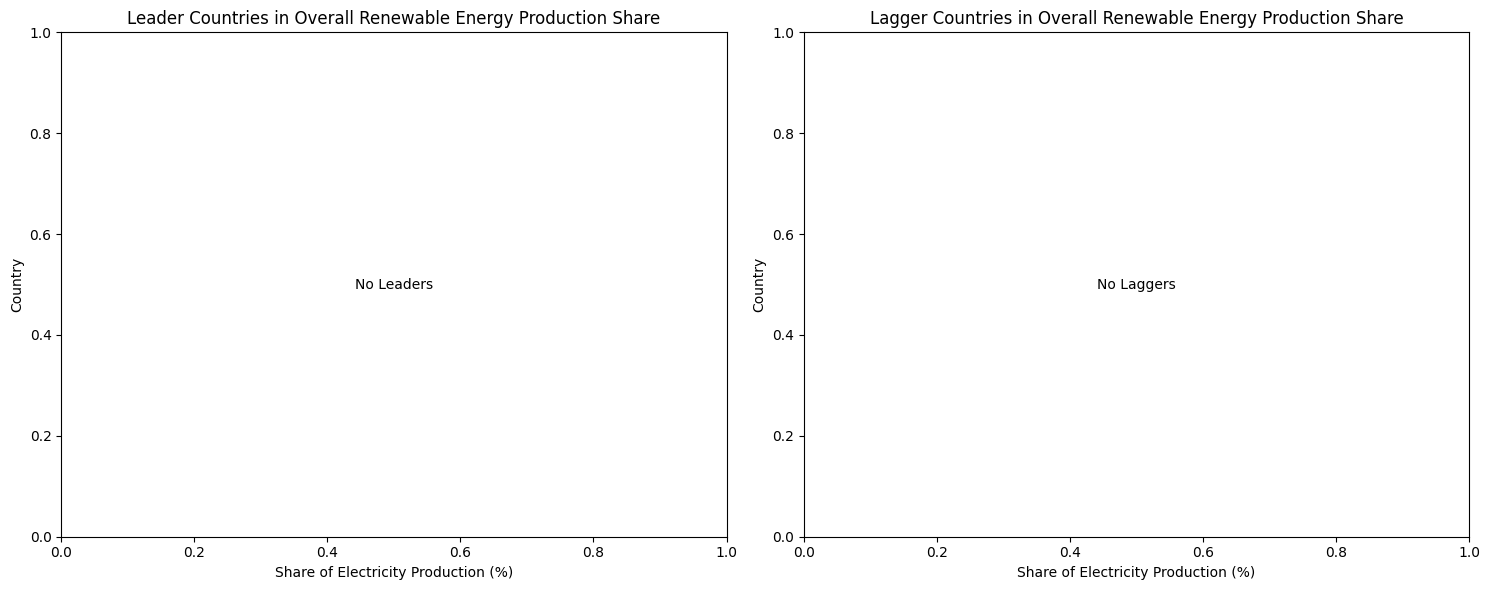

In [70]:
#find leaders and laggers in overall renewable energy production
#filter outliers dataframe where renewables_share_elec_mean is 'leader' or 'lagger'

leaders = df_last5[outliers['renewables_share_elec_mean'] == 'leader']
laggers = df_last5[outliers['renewables_share_elec_mean'] == 'lagger']

#add horizontal barplots for leaders and laggers in overall renewable energy production share
def plot_leader_lagger_barplots(leaders, laggers, value_col, title_prefix):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Leaders
    if not leaders.empty:  
        sorted_leaders = leaders.sort_values(value_col, ascending=False)
        sns.barplot(data=sorted_leaders, y='country_', x=value_col, ax=axes[0], color='green')
        axes[0].set_title(f'Leader Countries in {title_prefix}')
        axes[0].set_xlabel('Share of Electricity Production (%)')
        axes[0].set_ylabel('Country')
    else:
        axes[0].text(0.5, 0.5, 'No Leaders', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
        axes[0].set_title(f'Leader Countries in {title_prefix}')
        axes[0].set_xlabel('Share of Electricity Production (%)')
        axes[0].set_ylabel('Country')
    # Laggers
    if not laggers.empty:  
        sorted_laggers = laggers.sort_values(value_col, ascending=False)
        sns.barplot(data=sorted_laggers, y='country_', x=value_col, ax=axes[1], color='red')
        axes[1].set_title(f'Lagger Countries in {title_prefix}')
        axes[1].set_xlabel('Share of Electricity Production (%)')
        axes[1].set_ylabel('Country')
    else:
        axes[1].text(0.5, 0.5, 'No Laggers', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
        axes[1].set_title(f'Lagger Countries in {title_prefix}')
        axes[1].set_xlabel('Share of Electricity Production (%)')
        axes[1].set_ylabel('Country')
    plt.tight_layout()
    plt.show()

#plot leaders and laggers in overall renewable energy production share
plot_leader_lagger_barplots(leaders, laggers, 'renewables_share_elec_mean', 'Overall Renewable Energy Production Share')



Solar energy production:

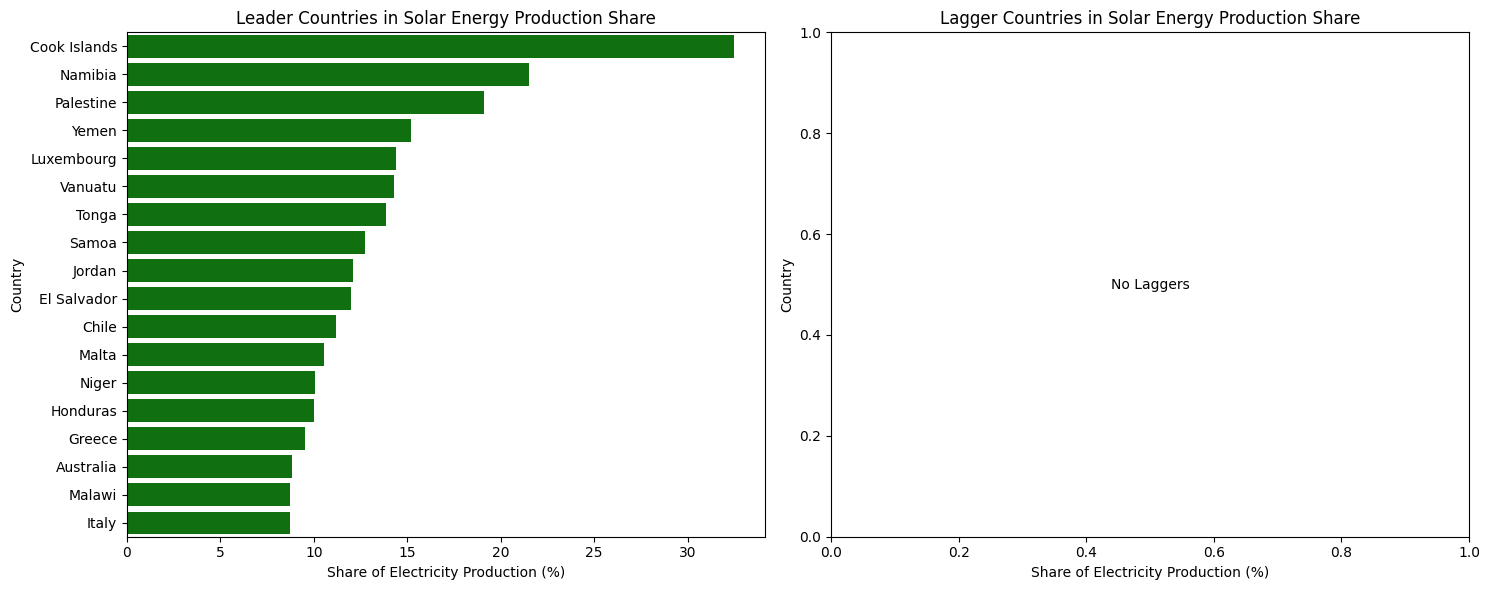

In [71]:
leaders = df_last5[outliers['solar_share_elec_mean'] == 'leader']
laggers = df_last5[outliers['solar_share_elec_mean'] == 'lagger']

#add horizontal barplots for leaders and laggers in solar energy production share
plot_leader_lagger_barplots(leaders, laggers, 'solar_share_elec_mean', 'Solar Energy Production Share')


Wind energy production:

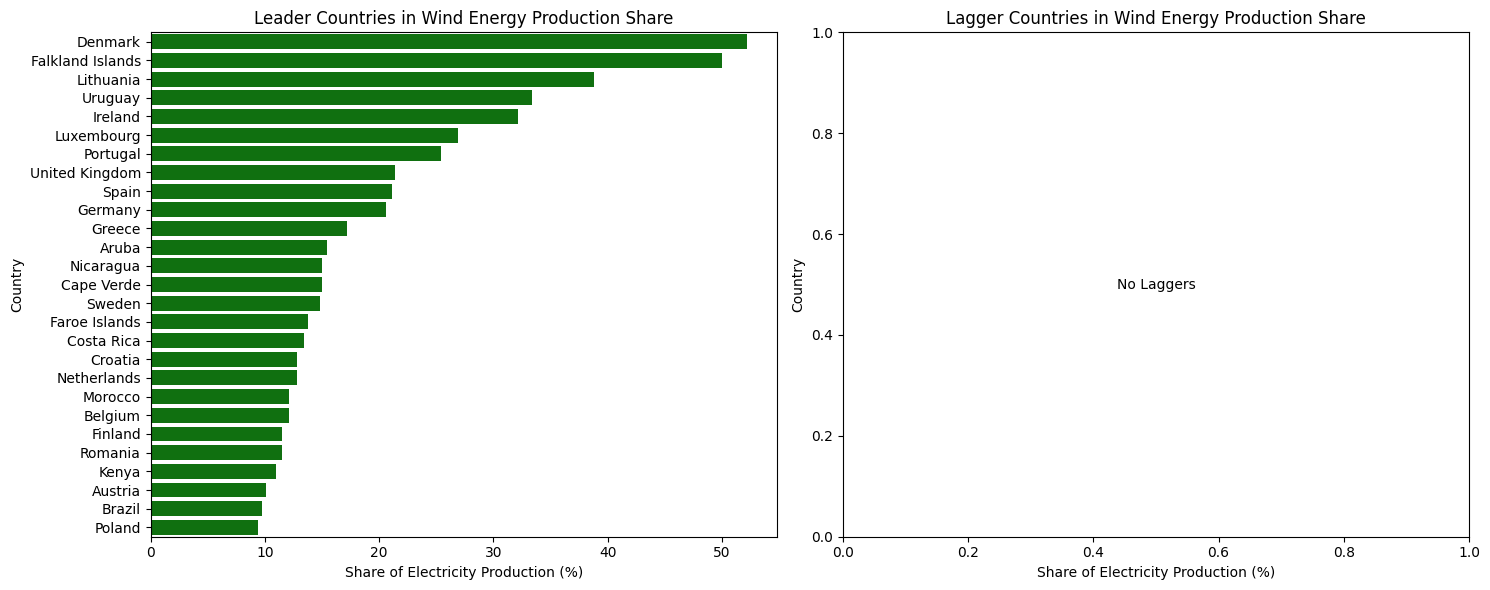

In [72]:
leaders = df_last5[outliers['wind_share_elec_mean'] == 'leader']
laggers = df_last5[outliers['wind_share_elec_mean'] == 'lagger']

#plot horizontal barplots for leaders and laggers in wind energy production share
plot_leader_lagger_barplots(leaders, laggers, 'wind_share_elec_mean', 'Wind Energy Production Share')

Hydro energy production:

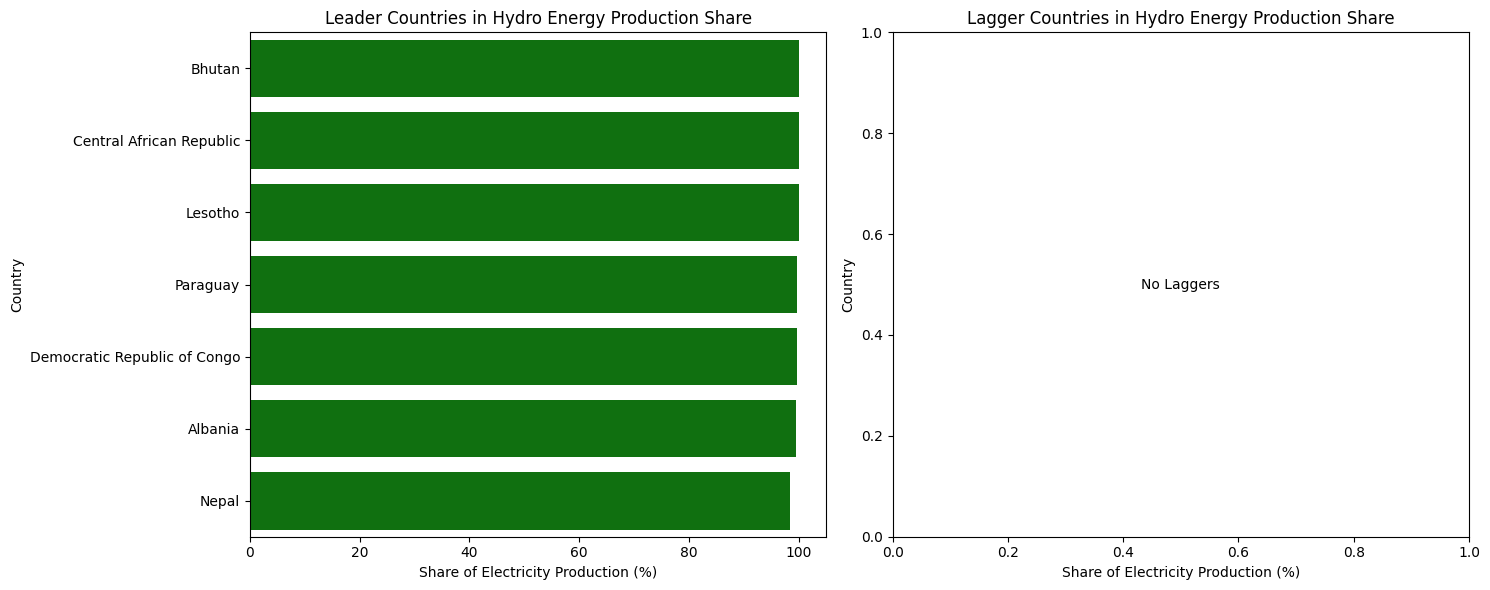

In [73]:
leaders = df_last5[outliers['hydro_share_elec_mean'] == 'leader']
laggers = df_last5[outliers['hydro_share_elec_mean'] == 'lagger']

#add horizontal barplots for leaders and laggers in overall renewable energy production share
plot_leader_lagger_barplots(leaders, laggers, 'hydro_share_elec_mean', 'Hydro Energy Production Share')

Biofuel energy production:

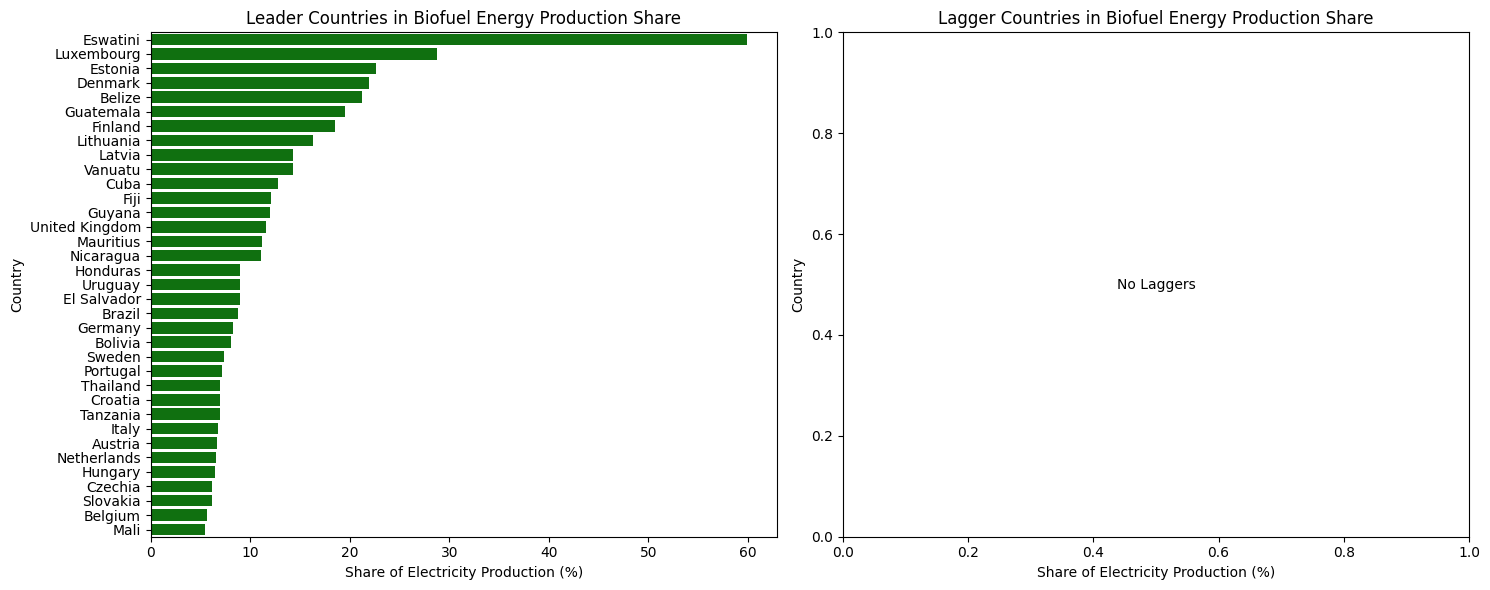

In [74]:
leaders = df_last5[outliers['biofuel_share_elec_mean'] == 'leader']
laggers = df_last5[outliers['biofuel_share_elec_mean'] == 'lagger']

#add horizontal barplots for leaders and laggers in biofuel energy production share
plot_leader_lagger_barplots(leaders, laggers, 'biofuel_share_elec_mean', 'Biofuel Energy Production Share')

Nuclear energy production:

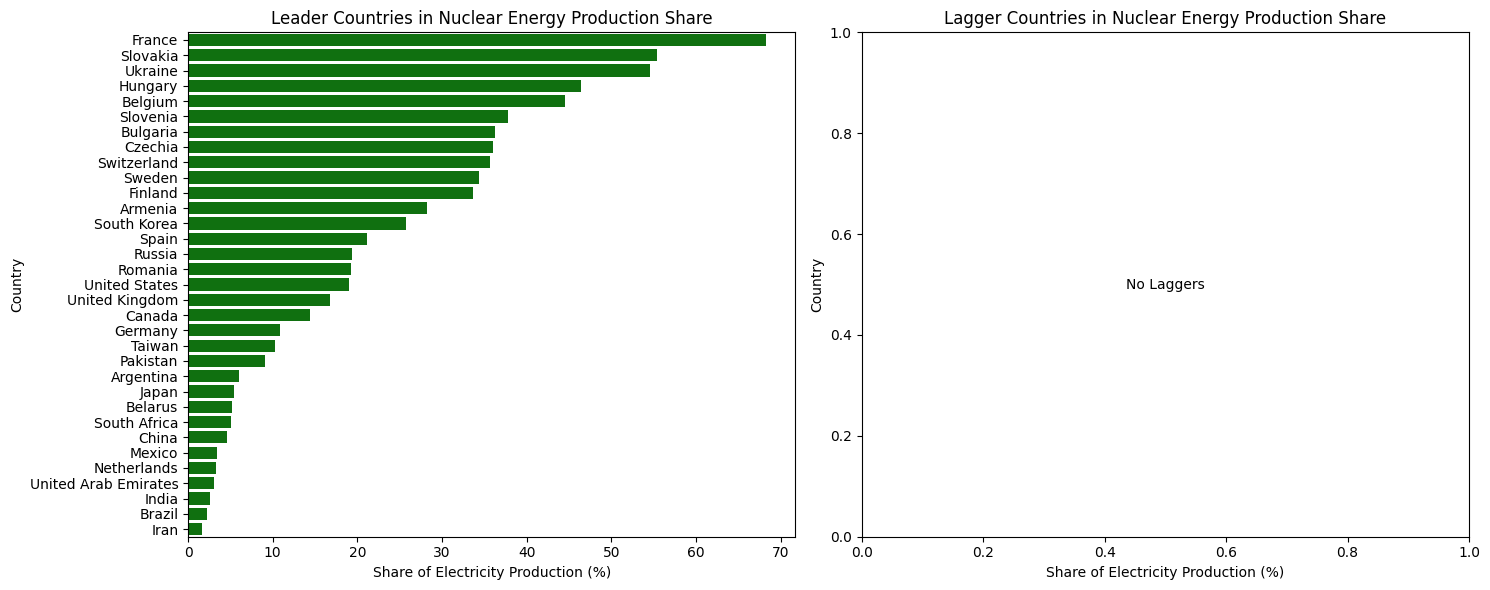

In [75]:
leaders = df_last5[outliers['nuclear_share_elec_mean'] == 'leader']
laggers = df_last5[outliers['nuclear_share_elec_mean'] == 'lagger']

#add horizontal barplots for leaders and laggers in nuclear energy production share
plot_leader_lagger_barplots(leaders, laggers, 'nuclear_share_elec_mean', 'Nuclear Energy Production Share')

**Conclusion:** In terms of average overall share of production of renewables over the last 5 years, there are no clear leaders or laggers. In addition, no countries were identified as 'laggers' in production of each type of renewable energy (likely due to the highly skewed distributions where most countries had low values to start with). However, different sets of countries were identified as leaders in the share of their energy production (averaged over the last 5 years) according to the type of renewable:

 - The Cook Islands, Namibia and Palestine are leaders in **solar** energy production, with over 20% of their energy produced via solar on average between 2018-2022. 
 - The top 3 countries producing **wind** energy were Denmark, Faulkland Islands and Lithunia, with over 40% of their energy coming from wind.
 - There were 7 countries identified as leaders in **hydro** production, with around 100% of their eenrgy coming from this source. These were; Bhutan, Central African Republic, Lesotho, Paraguay, Democratic Republic of Congo, Albania and Nepal.
 - Eswatiti was a clear leader in **biofuel** production, with on average 60% of their energy from biofuel between 2018-2022, followed by Luxenbourg at 30%.
 - France had the highest average % share of energy production coming from **nuclear** power between 2018-2022, followed by Slovakia and Ukraine.

### Forecasting growth in renewables

Now let's use the full data from 1982-2022 to predict future trends in renewables. Let's try a recurrent neural network (RNN) model, as these are good for sequential data such as time series. We'll start with a simple model of global renewables production.

Tasks to prep the data:
- select relevant columns and handle missing values
- re-format to long df
- scale variables
- split into train and test sets

This tutorial was followed for time series forecasting with RNN in Pytorch: https://www.geeksforgeeks.org/data-analysis/time-series-forecasting-using-pytorch/

In [21]:
#import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import math
from sklearn.preprocessing import MinMaxScaler
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV
from torch.optim import SGD, RMSprop, Adam

In [5]:
#df.head()
#select columns for forecasting model
df_forecast = df[['year','country', 'biofuel_elec_per_capita', 'hydro_elec_per_capita',
                     'nuclear_elec_per_capita', 'solar_elec_per_capita', 'wind_elec_per_capita']]
#forward fill missing values per country
df_forecast = df_forecast.sort_values(['country', 'year'])
df_forecast.update(df_forecast.groupby('country').ffill())
#still some missing values e.g. no info for certain countries for biofuel and nuclear
#sum production across countries per year to get global production per year
df_forecast_global = df_forecast.groupby(['year']).sum().reset_index()
#remove country column
df_forecast_global = df_forecast_global.drop(columns=['country'])
#set year as datetime
df_forecast_global['year'] = pd.to_datetime(df_forecast_global['year'], format='%Y')
#set year as index
df_forecast_global = df_forecast_global.set_index('year')
df_forecast_global.head()


,biofuel_elec_per_capita,hydro_elec_per_capita,nuclear_elec_per_capita,solar_elec_per_capita,wind_elec_per_capita
year,,,,,
1982-01-01,0.0,87723.111,23369.680,0.000,3.609
1983-01-01,0.0,93020.198,26979.516,0.013,5.659
1984-01-01,0.0,94185.041,32175.857,0.041,7.108
1985-01-01,0.0,97981.325,41960.908,0.064,10.819
1986-01-01,0.0,96612.576,45896.587,0.078,25.385


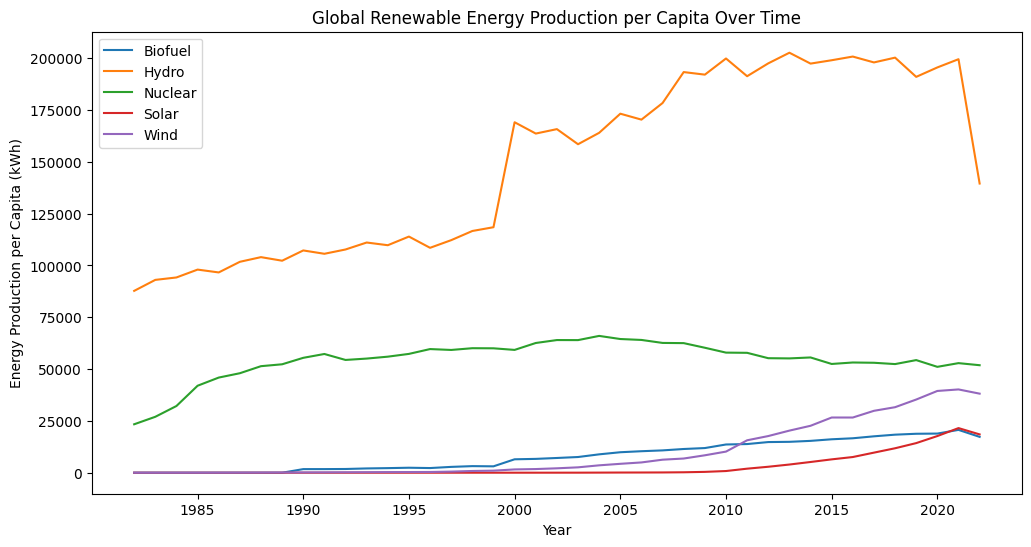

In [6]:
#plot time series of global renewable energy production per capita
plt.figure(figsize=(12, 6))
plt.plot(df_forecast_global['year'], df_forecast_global['biofuel_elec_per_capita'], label='Biofuel')
plt.plot(df_forecast_global['year'], df_forecast_global['hydro_elec_per_capita'], label='Hydro')
plt.plot(df_forecast_global['year'], df_forecast_global['nuclear_elec_per_capita'], label='Nuclear')
plt.plot(df_forecast_global['year'], df_forecast_global['solar_elec_per_capita'], label='Solar')
plt.plot(df_forecast_global['year'], df_forecast_global['wind_elec_per_capita'], label='Wind')
plt.title('Global Renewable Energy Production per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Production per Capita (kWh)')
plt.legend()
plt.show()

Set up the model! We'll do one model per energy type, starting with biofuel

#### Biofuel

In [ ]:

#split data into test and train sets
training_data_len = 30 #(first 30 years)

# Splitting the dataset
train_data = df_forecast_global[:training_data_len].iloc[:, :1]#select the column here (biofuel is 1st)
test_data = df_forecast_global[training_data_len:].iloc[:, :1]
print(train_data.shape, test_data.shape)
train_data

(30, 1) (11, 1)


,biofuel_elec_per_capita
year,
1982-01-01,0.000
1983-01-01,0.000
1984-01-01,0.000
1985-01-01,0.000
1986-01-01,0.000
1987-01-01,0.000
1988-01-01,0.000
1989-01-01,0.000
1990-01-01,1739.151


In [7]:
# Selecting biofuel production for test and train sets
dataset_train = train_data.biofuel_elec_per_capita.values
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1, 1))
print(dataset_train.shape)

dataset_test = test_data.biofuel_elec_per_capita.values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1, 1))
print(dataset_test.shape)


(30, 1)
(11, 1)


In [8]:
# Scaling dataset between 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[:5])

scaled_test = scaler.fit_transform(dataset_test)
print(scaled_test[:5])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.        ]
 [0.01970414]
 [0.09814874]
 [0.2283662 ]
 [0.31155138]]


Now we need to create sequences for the model, where each sequence contains a specified number of time steps. These are the 'windows' that the model will use for prediction. 

In [9]:
# Create sequences and labels for training data
def create_sequences(scaled_data, sequence_length):
    """
    Create sliding-window sequences and next-step labels and convert to PyTorch tensors.
    scaled_data: numpy array or array-like of shape (n_samples, n_features) or (n_samples,)
    sequence_length: number of time steps to include in each input sequence
    Returns: X (torch.Tensor: num_sequences, sequence_length, n_features), 
             y (torch.Tensor: num_sequences, n_features)
    """
    arr = np.asarray(scaled_data)
    if arr.ndim == 1:
        arr = arr.reshape(-1, 1)
    X, y = [], []
    for i in range(len(arr) - sequence_length):
        X.append(arr[i:i + sequence_length])
        y.append(arr[i + sequence_length])
    X = np.array(X)
    y = np.array(y)
    # Convert to torch tensors (float32)
    X_t = torch.tensor(X, dtype=torch.float32)
    y_t = torch.tensor(y, dtype=torch.float32)
    return X_t, y_t

# create train sequences (returns PyTorch tensors)
sequence_length=5
X_train, y_train = create_sequences(scaled_train, sequence_length)
print(X_train.shape, y_train.shape)

# Create sequences and labels for testing data
sequence_length=2
X_test, y_test = create_sequences(scaled_test, sequence_length)
print(X_test.shape, y_test.shape)

torch.Size([25, 5, 1]) torch.Size([25, 1])
torch.Size([9, 2, 1]) torch.Size([9, 1])


First we will try and tune the hyperparameters using gridsearchCV (following this code:https://stackoverflow.com/questions/77007252/how-to-perform-hyperparameter-tuning-of-lstm-using-gridsearchcv)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=128, num_layers=3, output_size=1, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        # Initialize hidden state and cell state
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))
        
        # Get the output from the last time step
        out = self.linear(out[:, -1, :])
        return out

    # Required for skorch compatibility
    def get_params(self, deep=True):
        return {
            'input_size': 1,
            'hidden_size': self.hidden_size,
            'num_layers': self.num_layers,
            'output_size': 1
        }
    
# Create the model with skorch, specifying optimizer explicitly
model = NeuralNetRegressor(
    LSTMModel,
    criterion=nn.MSELoss(reduction='mean'),
    optimizer=Adam,  # Pass optimizer class, not string
    verbose=False
)

# Define grid search parameters - modify optimizer param
param_grid = {
    'batch_size': [10, 20, 40, 60, 80, 100],
    'max_epochs': [10, 50, 100],
    'optimizer__lr': [0.001, 0.01, 0.1],  # Learning rates for optimizer
    # Add other optimizer-specific parameters if needed
    # 'optimizer__weight_decay': [0.0001, 0.001],
    # 'optimizer__momentum': [0.9], # for SGD
}

# Run grid search
grid = GridSearchCV(estimator=model, 
                   param_grid=param_grid, 
                   n_jobs=-1, 
                   cv=3, 
                   scoring='r2',
                   error_score='raise')  # Added to get more detailed error messages
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best accuracy of: %f using %s" % (grid_result.best_score_, 
                                         grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Define and train the model using the best parameters identified

In [26]:
#set up the model as a class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout=0.2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.linear(out[:, -1, :])
        return out

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')#uses gpu if available, otherwise cpu
print(device)

#specify hyperparameters
input_size = 1
num_layers = 3  # Increased number of layers
hidden_size = 128  # Increased number of hidden units
output_size = 1
dropout = 0.2  # Added dropout for regularization

model = LSTMModel(input_size, hidden_size, num_layers, output_size, dropout).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Learning rate

batch_size = 100 # Adjusted batch size
#utility to handle batching and shuffling of the dataset
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_epochs = 50  # Increased number of epochs
train_hist = []
test_hist = []

#loop over the dataset for a specified number of epochs, performing forward and backward passes and updating model weights
for epoch in range(num_epochs):
    total_loss = 0.0
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        predictions = model(batch_X)
        loss = loss_fn(predictions, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_hist.append(average_loss)

    model.eval()
    with torch.no_grad():
        total_test_loss = 0.0

        for batch_X_test, batch_y_test in test_loader:
            batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
            predictions_test = model(batch_X_test)
            test_loss = loss_fn(predictions_test, batch_y_test)

            total_test_loss += test_loss.item()

        average_test_loss = total_test_loss / len(test_loader)
        test_hist.append(average_test_loss)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')

cpu
Epoch [10/50] - Training Loss: 0.2273, Test Loss: 0.2705
Epoch [20/50] - Training Loss: 0.1033, Test Loss: 0.1718
Epoch [30/50] - Training Loss: 0.0171, Test Loss: 0.1369
Epoch [40/50] - Training Loss: 0.0085, Test Loss: 0.1252
Epoch [50/50] - Training Loss: 0.0047, Test Loss: 0.1244


Compare training and test losses

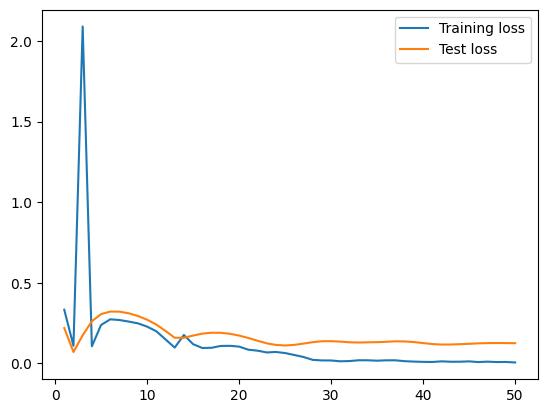

In [27]:
x = np.linspace(1,num_epochs,num_epochs)
plt.plot(x,train_hist,scalex=True, label="Training loss")
plt.plot(x, test_hist, label="Test loss")
plt.legend()
plt.show()

Evaluate model performance using RMSE and R-squared

In [28]:
# Evaluate the model and calculate RMSE and R² score
from sklearn.metrics import mean_squared_error, r2_score

model.eval()
with torch.no_grad():
    test_predictions = []
    for batch_X_test in X_test:
        batch_X_test = batch_X_test.to(device).unsqueeze(0)  # Add batch dimension
        test_predictions.append(model(batch_X_test).cpu().numpy().flatten()[0])

test_predictions = np.array(test_predictions)

# Calculate RMSE and R² score
rmse = np.sqrt(mean_squared_error(y_test.cpu().numpy(), test_predictions))
r2 = r2_score(y_test.cpu().numpy(), test_predictions)

print(f'RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

RMSE: 0.3527
R² Score: -0.8342


Look at predicted vs actual values

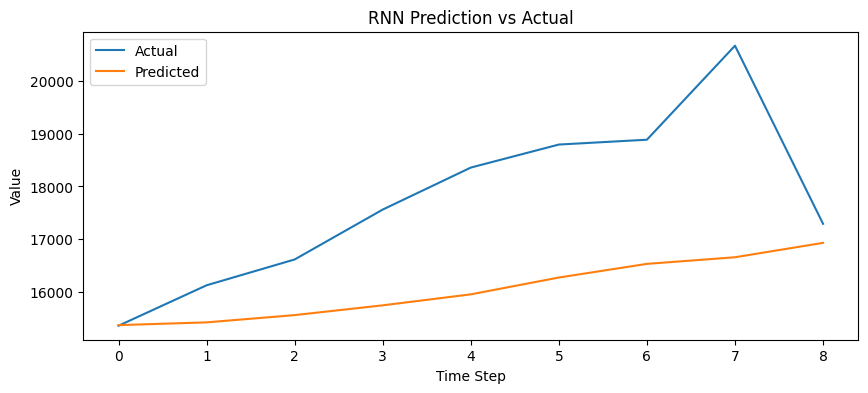

In [ ]:
model.eval()  
with torch.no_grad():  
  predictions = model(X_test).squeeze().numpy() # Predict on test set  

# Inverse transform to original scale  
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))  
predictions_inv = scaler.inverse_transform(predictions.reshape(-1, 1))  


# Plot actual vs predicted  
plt.figure(figsize=(10, 4))  
plt.plot(y_test_inv, label='Actual')  
plt.plot(predictions_inv, label='Predicted')  
plt.title("LSTM Prediction vs Actual")  
plt.xlabel("Time Step")  
plt.ylabel("Value")  
plt.legend()  
plt.show() 

Forecast future values

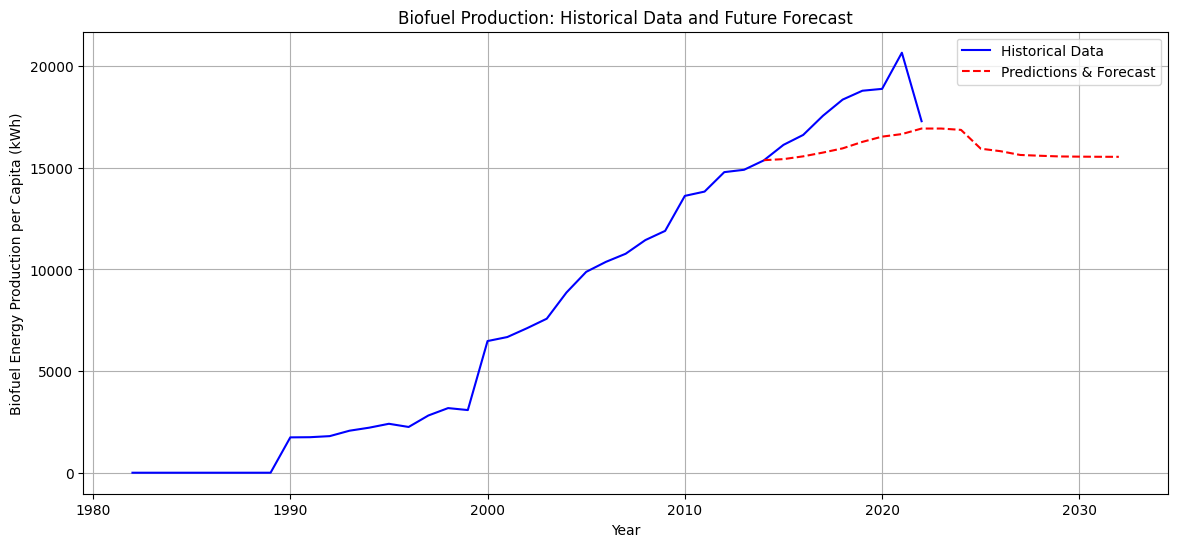

In [40]:
num_forecast_steps = 10
sequence_to_plot = X_test.squeeze().cpu().numpy()
historical_data = sequence_to_plot[-1]

# Generate forecast values
forecasted_values = []
with torch.no_grad():
    for _ in range(num_forecast_steps):
        historical_data_tensor = torch.as_tensor(historical_data).view(1, -1, 1).float().to(device)
        predicted_value = model(historical_data_tensor).cpu().numpy()[0, 0]
        forecasted_values.append(predicted_value)
        historical_data = np.roll(historical_data, shift=-1)
        historical_data[-1] = predicted_value

# Get predictions for test period (2014-2022)
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).cpu().numpy()
    test_predictions = scaler.inverse_transform(test_predictions)

# Create date range for full prediction period (2014-2032)
last_historical_date = test_data.index[-1]
future_dates = pd.date_range(start=last_historical_date + pd.DateOffset(years=1),
                           periods=num_forecast_steps,
                           freq='YS')

# Align prediction dates with actual predictions length
prediction_dates = test_data.index[-(len(test_predictions)):].union(future_dates)

# Combine test predictions and forecast
all_predictions = np.concatenate([test_predictions.flatten(), 
                                scaler.inverse_transform(np.array(forecasted_values).reshape(-1, 1)).flatten()])

plt.figure(figsize=(14, 6))

# Plot complete historical data (1982-2022)
plt.plot(df_forecast_global.index, df_forecast_global['biofuel_elec_per_capita'],
         label='Historical Data', color='blue')

# Plot predictions (2014-2032) 
plt.plot(prediction_dates, all_predictions,
         label='Predictions & Forecast', color='red', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Biofuel Energy Production per Capita (kWh)')
plt.title('Biofuel Production: Historical Data and Future Forecast')
plt.legend()
plt.grid(True)
plt.show()
